In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 2019년도 장애인 콜택시 일별 이용현황 데이터

In [69]:
data2019 = pd.read_excel("./data/2019년도 로우데이터.xlsx")

In [70]:
print(data2019.shape)
data2019.head()

(573182, 15)


,연번,접수일시,희망일시,배차시간,탑승시간,하차시간,대기시간,출발시,출발구,출발동,목적시,목적구,목적동,승차거리,요금
0,1,2019-01-01 00:02:18.460,2019-01-01 00:02:00,2019-01-01 03:56:23.723,2019-01-01 04:15:34.057,2019-01-01 04:38:59.470,253,서울특별시,종로구,삼청동,서울특별시,성북구,월곡제1동,10304.0,2900
1,2,2019-01-01 00:12:37.903,2019-01-01 00:13:00,2019-01-01 03:17:55.507,2019-01-01 03:36:10.807,2019-01-01 03:51:42.493,203,서울특별시,성북구,보문동,서울특별시,강북구,삼각산동,5339.0,1700
2,3,2019-01-01 00:14:23.000,2019-01-01 00:15:00,2019-01-01 03:03:29.807,2019-01-01 03:23:47.993,2019-01-01 03:46:00.090,188,서울특별시,강북구,인수동,서울특별시,노원구,하계2동,6966.0,2000
3,4,2019-01-01 00:16:46.000,2019-01-01 00:17:00,2019-01-01 03:55:49.600,2019-01-01 04:16:51.000,2019-01-01 04:58:39.293,239,서울특별시,중구,회현동,경기도,부천시소사구,송내1동,29331.0,4300
4,5,2019-01-01 00:20:57.037,2019-01-01 00:21:00,2019-01-01 01:35:59.700,2019-01-01 02:13:11.223,2019-01-01 02:17:09.167,112,서울특별시,은평구,구산동,서울특별시,은평구,역촌동,1831.0,1500


In [71]:
data2019.isnull().sum()

연번       0
접수일시     0
희망일시     0
배차시간    88
탑승시간     0
하차시간     0
대기시간     0
출발시      0
출발구      1
출발동      1
목적시      1
목적구      1
목적동      1
승차거리    18
요금       0
dtype: int64

In [72]:
print(len(data2019.출발동.unique()))
data2019.출발동.unique()

636


array(['삼청동', '보문동', '인수동', '회현동', '구산동', '여의동', '창신제1동', '일원1동', '이화동',
       '성수2가제1동', '청림동', '구로제2동', '서교동', '영등포동', '송중동', '행당제1동', '하계1동',
       '합정동', '월계2동', '석관동', '면목제2동', '삼성동', '면목제5동', '오류제2동', '신촌동',
       '등촌제3동', '고척제2동', '하계2동', '화양동', '양재2동', '용문동', '망우본동', '쌍문제3동',
       '북아현동', '송천동', '삼선동', '화곡본동', '중계4동', '가양제3동', '잠실2동', '역촌동',
       '가양제1동', '전농제2동', '수색동', '상계10동', '둔촌제2동', '상암동', '중곡제4동', '창제3동',
       '종암동', '성현동', '신길제1동', '문정1동', '대방동', '양재1동', '일원2동', '상도제2동',
       '신내2동', '쌍문제4동', '풍납2동', '신당제4동', '성산제2동', '상봉제1동', '길동', '수유제3동',
       '군자동', '방배4동', '화곡제1동', '수서동', '천호제1동', '답십리제2동', '장안제3동', '번제3동',
       '삼성2동', '천호제2동', '세곡동', '용두동', '응암제3동', '명일제1동', '우장산동', '휘경제2동',
       '행운동', '삼양동', '염창동', '부암동', '독산제1동', '월계1동', '방화제2동', '명동', '응봉동',
       '가양제2동', '도봉제2동', '낙성대동', '가산동', '신설동', '불광제1동', '용답동', '신정4동',
       '공릉1.3동', '갈현제2동', '신월7동', '청파동', '독산제4동', '홍은제2동', '성사1동',
       '화곡제6동', '불광제2동', '거여2동', '반포본동', '도화동', '신당제3동', '공항동', '흑

In [73]:
print(len(data2019.출발시.unique()))
data2019.출발시.unique()

3


array(['서울특별시', '경기도', '인천광역시'], dtype=object)

In [74]:
# 출발동, 목적동 양쪽 공백 제거
data2019.출발동 = data2019.출발동.str.strip()
data2019.목적동 = data2019.목적동.str.strip()

In [75]:
print(len(data2019[data2019.출발시 == "서울특별시"].출발동.unique()))
data2019[data2019.출발시 == "서울특별시"].출발동.unique()

432


array(['삼청동', '보문동', '인수동', '회현동', '구산동', '여의동', '창신제1동', '일원1동', '이화동',
       '성수2가제1동', '청림동', '구로제2동', '서교동', '영등포동', '송중동', '행당제1동', '하계1동',
       '합정동', '월계2동', '석관동', '면목제2동', '삼성동', '면목제5동', '오류제2동', '신촌동',
       '등촌제3동', '고척제2동', '하계2동', '화양동', '양재2동', '용문동', '망우본동', '쌍문제3동',
       '북아현동', '송천동', '삼선동', '화곡본동', '중계4동', '가양제3동', '잠실2동', '역촌동',
       '가양제1동', '전농제2동', '수색동', '상계10동', '둔촌제2동', '상암동', '중곡제4동', '창제3동',
       '종암동', '성현동', '신길제1동', '문정1동', '대방동', '양재1동', '일원2동', '상도제2동',
       '신내2동', '쌍문제4동', '풍납2동', '신당제4동', '성산제2동', '상봉제1동', '길동', '수유제3동',
       '군자동', '방배4동', '화곡제1동', '수서동', '천호제1동', '답십리제2동', '장안제3동', '번제3동',
       '삼성2동', '천호제2동', '세곡동', '용두동', '응암제3동', '명일제1동', '우장산동', '휘경제2동',
       '행운동', '삼양동', '염창동', '부암동', '독산제1동', '월계1동', '방화제2동', '명동', '응봉동',
       '가양제2동', '도봉제2동', '낙성대동', '가산동', '신설동', '불광제1동', '용답동', '신정4동',
       '공릉1.3동', '갈현제2동', '신월7동', '청파동', '독산제4동', '홍은제2동', '화곡제6동',
       '불광제2동', '거여2동', '반포본동', '도화동', '신당제3동', '공항동', '흑석동', '묵제

### 행정동별 주민센터 위치 데이터 (2022.07 기준)

In [76]:
community_center = pd.read_excel("./data/행정동별주민센터.xlsx", sheet_name="seoul")

In [77]:
print(community_center.shape)
community_center.head()

(426, 9)


,연번,시도,시군구,읍면동,우편번호,주 소,행정동,Latitude,Longitude
0,1,서울,종로구,청운효자동주민센터,3047,서울특별시 종로구 자하문로 92,청운효자동,37.584088,126.970609
1,2,서울,종로구,사직동주민센터,3027,서울특별시 종로구 사직로9길 1,사직동,37.576172,126.968804
2,3,서울,종로구,삼청동주민센터,3049,서울특별시 종로구 삼청로 107,삼청동,37.584949,126.981746
3,4,서울,종로구,부암동주민센터,3022,서울특별시 종로구 창의문로 145,부암동,37.592393,126.964026
4,5,서울,종로구,평창동주민센터,3009,서울특별시 종로구 평창문화로 65,평창동,37.606363,126.968335


In [78]:
# 행정동 공백 제거
community_center.행정동 = community_center.행정동.str.strip()

In [79]:
len(community_center.시도.unique())
community_center.시도.unique()

array(['서울'], dtype=object)

In [80]:
print(len(community_center.행정동.unique()))
community_center.행정동.unique()

425


array(['청운효자동', '사직동', '삼청동', '부암동', '평창동', '무악동', '교남동', '가회동',
       '종로1234가동', '종로56가동', '이화동', '혜화동', '창신1동', '창신2동', '창신3동', '숭인1동',
       '숭인2동', '소공동', '회현동', '명동', '필동', '장충동', '광희동', '을지로동', '신당동',
       '다산동', '약수동', '청구동', '신당제5동', '동화동', '황학동', '중림동', '후암동', '용산2가동',
       '남영동', '청파동', '원효로제1동', '원효로제2동', '효창동', '용문동', '한강로동', '이촌제1동',
       '이촌제2동', '이태원제1동', '이태원제2동', '한남동', '서빙고동', '보광동', '왕십리도선동',
       '왕십리제2동', '마장동', '사근동', '행당제1동', '행당제2동', '응봉동', '금호1가동',
       '금호2.3가동', '금호4가동', '옥수동', '성수1가제1동', '성수1가제2동', '성수2가제1동',
       '성수2가제3동', '송정동', '용답동', '중곡제1동', '중곡제2동', '중곡제3동', '중곡제4동', '능동',
       '구의제1동', '구의제2동', '구의제3동', '광장동', '자양제1동', '자양제2동', '자양제3동',
       '자양제4동', '화양동', '군자동', '용신동', '제기동', '전농제1동', '전농제2동', '답십리제1동',
       '답십리제2동', '장안제1동', '장안제2동', '청량리동', '회기동', '휘경제1동', '휘경제2동',
       '이문제1동', '이문제2동', '면목본동', '면목제2동', '면목제38동', '면목제4동', '면목제5동',
       '면목제7동', '상봉제1동', '상봉제2동', '중화제1동', '중화제2동', '묵제1동', '묵제2동',
       '망우본동', '망우제3동', 

### 장애인 콜택시 차고지 데이터

In [81]:
taxi_garage = pd.read_excel("./data/장애인콜택시차고지.xlsx")

In [82]:
print(taxi_garage.shape)

(40, 7)


### 가장 가까운 차고지와의 거리 계산

In [83]:
np.sqrt(np.min(np.sum((taxi_garage.iloc[:,5:] - community_center.iloc[0, 7:]) ** 2, axis = 1)))

0.011351023271049207

In [84]:
def cal_min_distance(location):
    return np.sqrt(np.min(np.sum((taxi_garage.iloc[:,5:] - location) ** 2, axis = 1)))

In [85]:
community_center['최근접_차고지_거리'] = community_center.iloc[:, 7:].apply(cal_min_distance, axis = 1)

### 행정동명 통일 및 데이터 수정

In [86]:
call_taxi_dongs = set(data2019[data2019.출발시 == "서울특별시"].출발동.unique())
community_dongs = set(community_center.행정동.unique())

In [87]:
set.difference(call_taxi_dongs, community_dongs)

{'공릉1.3동',
 '답십리제3동',
 '답십리제4동',
 '면목제3.8동',
 '명륜3가동',
 '번제1동',
 '번제2동',
 '번제3동',
 '상일동',
 '수유제1동',
 '수유제2동',
 '수유제3동',
 '숭인제1동',
 '숭인제2동',
 '신내1동',
 '신내2동',
 '신당제1동',
 '신당제2동',
 '신당제3동',
 '신당제4동',
 '신당제6동',
 '신설동',
 '영종동',
 '용두동',
 '이문제3동',
 '장안제3동',
 '장안제4동',
 '전농제3동',
 '제기제1동',
 '제기제2동',
 '종로1.2.3.4가동',
 '종로5.6가동',
 '창신제1동',
 '창신제2동',
 '창신제3동'}

In [88]:
set.difference(community_dongs, call_taxi_dongs)

{'공릉1동',
 '다산동',
 '동화동',
 '면목제38동',
 '번1동',
 '번2동',
 '번3동',
 '상일제1동',
 '상일제2동',
 '수유1동',
 '수유2동',
 '수유3동',
 '숭인1동',
 '숭인2동',
 '신내제1동',
 '신내제2동',
 '신당동',
 '약수동',
 '용신동',
 '위례동',
 '제기동',
 '종로1234가동',
 '종로56가동',
 '창신1동',
 '창신2동',
 '창신3동',
 '청구동',
 '항동'}

#### 공릉 1동 및 3동

In [89]:
data2019[data2019.출발동 == "공릉1.3동"]

,연번,접수일시,희망일시,배차시간,탑승시간,하차시간,대기시간,출발시,출발구,출발동,목적시,목적구,목적동,승차거리,요금
131,132,2019-01-01 08:55:52.000,2019-01-01 08:56:00,2019-01-01 09:07:37.487,2019-01-01 09:25:16.567,2019-01-01 09:35:22.537,29,서울특별시,노원구,공릉1.3동,서울특별시,노원구,하계1동,2206.0,1500
183,184,2019-01-01 09:46:32.000,2019-01-01 09:47:00,2019-01-01 10:01:27.187,2019-01-01 10:09:33.160,2019-01-01 10:43:03.380,22,서울특별시,노원구,공릉1.3동,서울특별시,성동구,성수2가제1동,10787.0,2900
231,232,2019-01-01 10:00:42.000,2019-01-01 10:01:00,2019-01-01 10:02:47.170,2019-01-01 10:22:16.257,2019-01-01 10:41:48.287,21,서울특별시,노원구,공릉1.3동,서울특별시,광진구,구의제2동,12139.0,3100
905,906,2019-01-01 18:25:42.000,2019-01-01 18:26:00,2019-01-01 18:42:41.820,2019-01-01 19:00:51.587,2019-01-01 19:20:19.493,34,서울특별시,노원구,공릉1.3동,서울특별시,강북구,번제3동,3569.0,1500
950,951,2019-01-01 19:32:31.000,2019-01-01 19:33:00,2019-01-01 21:10:29.370,2019-01-01 21:30:56.710,2019-01-01 22:18:30.110,117,서울특별시,노원구,공릉1.3동,경기도,성남시분당구,정자3동,39180.0,5000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
571719,571720,2019-06-29 10:03:08.733,2019-06-30 08:00:00,2019-06-30 08:08:18.403,2019-06-30 08:33:06.623,2019-06-30 08:53:54.600,33,서울특별시,노원구,공릉1.3동,서울특별시,강북구,수유제2동,7034.0,2300
572017,572018,2019-06-30 09:50:18.000,2019-06-30 09:51:00,2019-06-30 10:38:48.647,2019-06-30 11:05:03.803,2019-06-30 11:24:57.930,74,서울특별시,노원구,공릉1.3동,서울특별시,강북구,송천동,6671.0,2000
572232,572233,2019-06-30 11:36:42.000,2019-06-30 11:37:00,2019-06-30 11:37:44.607,2019-06-30 11:48:56.680,2019-06-30 12:04:35.783,11,서울특별시,노원구,공릉1.3동,서울특별시,도봉구,창제4동,4249.0,1500
572358,572359,2019-06-30 12:26:06.693,2019-06-30 12:26:00,2019-06-30 12:34:54.210,2019-06-30 12:47:15.313,2019-06-30 13:09:09.433,21,서울특별시,노원구,공릉1.3동,서울특별시,도봉구,쌍문제3동,7947.0,2300


In [90]:
# 콜택시 데이터에서는 공릉 1동과 3동을 구분하지 않고, 공릉 1.3동으로 표시
print(data2019[data2019.출발동 == "공릉1동"])
print(data2019[data2019.출발동 == "공릉3동"])

Empty DataFrame
Columns: [연번, 접수일시, 희망일시, 배차시간, 탑승시간, 하차시간, 대기시간, 출발시, 출발구, 출발동, 목적시, 목적구, 목적동, 승차거리, 요금]
Index: []
Empty DataFrame
Columns: [연번, 접수일시, 희망일시, 배차시간, 탑승시간, 하차시간, 대기시간, 출발시, 출발구, 출발동, 목적시, 목적구, 목적동, 승차거리, 요금]
Index: []


In [91]:
print(community_center[community_center.행정동 == "공릉1동"])
print(community_center[community_center.행정동 == "공릉3동"])

      연번  시도  시군구       읍면동  우편번호                  주    소   행정동   Latitude   
160  161  서울  노원구  공릉1동주민센터  1844  서울특별시 노원구 동일로186길 3-24  공릉1동  37.624779  \

      Longitude  최근접_차고지_거리  
160  127.073764     0.01255  
Empty DataFrame
Columns: [연번, 시도, 시군구, 읍면동, 우편번호, 주    소, 행정동, Latitude, Longitude, 최근접_차고지_거리]
Index: []


In [92]:
# 공릉 1동과 3동은 공릉 1동의 주민센터에서 동시에 관리함.
community_center.loc[community_center.행정동 == "공릉1동", "행정동"] = "공릉1.3동"

#### 종로 1,2,3,4동 / 5,6동 (주민센터 통일)

In [93]:
community_center.loc[community_center.행정동 == "종로1234가동","행정동"] = "종로1.2.3.4가동"
community_center.loc[community_center.행정동 == "종로56가동","행정동"] = "종로5.6가동"

#### 수유 1,2,3동

In [94]:
community_center.loc[community_center.행정동 == "수유1동","행정동"] = "수유제1동"
community_center.loc[community_center.행정동 == "수유2동","행정동"] = "수유제2동"
community_center.loc[community_center.행정동 == "수유3동","행정동"] = "수유제3동"

#### 숭인 1,2동

In [95]:
community_center.loc[community_center.행정동 == "숭인1동","행정동"] = "숭인제1동"
community_center.loc[community_center.행정동 == "숭인2동","행정동"] = "숭인제2동"

#### 번 1,2,3동

In [96]:
community_center.loc[community_center.행정동 == "번1동","행정동"] = "번제1동"
community_center.loc[community_center.행정동 == "번2동","행정동"] = "번제2동"
community_center.loc[community_center.행정동 == "번3동","행정동"] = "번제3동"

#### 면목 3,8동 (주민센터 통일)

In [97]:
community_center.loc[community_center.행정동 == "면목제38동","행정동"] = "면목제3.8동"

#### 상일동 (주민센터 통일)

In [98]:
community_center.loc[community_center.행정동 == "상일제1동","행정동"] = "상일동"
community_center.loc[community_center.행정동 == "상일제2동","행정동"] = "상일동"

#### 숭인 1,2동

In [99]:
community_center.loc[community_center.행정동 == "숭인1동","행정동"] = "숭인제1동"
community_center.loc[community_center.행정동 == "숭인2동","행정동"] = "숭인제2동"

#### 신내 1,2동

In [100]:
community_center.loc[community_center.행정동 == "신내제1동","행정동"] = "신내1동"
community_center.loc[community_center.행정동 == "신내제2동","행정동"] = "신내2동"

#### 신당동 1,2,3,4,6동

In [101]:
data2019[data2019.출발동 == "신당제5동"].head(3)

,연번,접수일시,희망일시,배차시간,탑승시간,하차시간,대기시간,출발시,출발구,출발동,목적시,목적구,목적동,승차거리,요금
2691,2692,2019-01-02 11:55:29.793,2019-01-02 11:55:00,2019-01-02 12:00:19.843,2019-01-02 12:27:02.427,2019-01-02 12:40:56.233,32,서울특별시,중구,신당제5동,서울특별시,중구,장충동,3501.0,1500
2764,2765,2019-01-02 12:04:44.493,2019-01-02 12:05:00,2019-01-02 12:13:47.463,2019-01-02 12:36:38.783,2019-01-02 12:56:05.693,31,서울특별시,중구,신당제5동,서울특별시,종로구,종로1.2.3.4가동,4350.0,1500
4959,4960,2019-01-03 07:25:23.450,2019-01-03 07:25:00,2019-01-03 08:10:40.770,2019-01-03 08:32:44.057,2019-01-03 08:57:35.403,67,서울특별시,중구,신당제5동,서울특별시,동대문구,회기동,5924.0,1700


In [102]:
community_center[community_center.행정동 == "신당제5동"]

,연번,시도,시군구,읍면동,우편번호,주 소,행정동,Latitude,Longitude,최근접_차고지_거리
28,29,서울,중 구,신당제5동주민센터,4578,서울특별시 중구 다산로44길 85,신당제5동,37.565108,127.021875,0.018472


In [103]:
data2019.loc[data2019.출발동 == "신당제1동","출발동"] = "신당동"
data2019.loc[data2019.출발동 == "신당제2동","출발동"] = "신당동"
data2019.loc[data2019.출발동 == "신당제3동","출발동"] = "신당동"
data2019.loc[data2019.출발동 == "신당제4동","출발동"] = "신당동"
data2019.loc[data2019.출발동 == "신당제6동","출발동"] = "신당동"

data2019.loc[data2019.목적동 == "신당제1동","목적동"] = "신당동"
data2019.loc[data2019.목적동 == "신당제2동","목적동"] = "신당동"
data2019.loc[data2019.목적동 == "신당제3동","목적동"] = "신당동"
data2019.loc[data2019.목적동 == "신당제4동","목적동"] = "신당동"
data2019.loc[data2019.목적동 == "신당제6동","목적동"] = "신당동"

#### 창신 1,2,3동

In [104]:
community_center.loc[community_center.행정동 == "창신1동","행정동"] = "창신제1동"
community_center.loc[community_center.행정동 == "창신2동","행정동"] = "창신제2동"
community_center.loc[community_center.행정동 == "창신3동","행정동"] = "창신제3동"

#### 신설동, 용두동 -> 용신동

In [105]:
data2019.loc[(data2019.출발동 == "신설동") | (data2019.출발동 == "용두동"), "출발동"] = "용신동"
data2019.loc[(data2019.목적동 == "신설동") | (data2019.목적동 == "용두동"), "목적동"] = "용신동"

#### 답십리3, 5동 -> 답십리1동 , 답십리4동 -> 답십리2동

In [106]:
data2019.loc[(data2019.출발동 == "답십리제3동") | (data2019.출발동 == "답십리제3동"), "출발동"] = "답십리제1동"
data2019.loc[(data2019.목적동 == "답십리제3동") | (data2019.목적동 == "답십리제3동"), "목적동"] = "답십리제1동"

data2019.loc[(data2019.출발동 == "답십리제4동") | (data2019.출발동 == "답십리제4동"), "출발동"] = "답십리제2동"
data2019.loc[(data2019.목적동 == "답십리제4동") | (data2019.목적동 == "답십리제4동"), "목적동"] = "답십리제2동"

#### 명륜3가동 -> 혜화동

In [107]:
data2019.loc[(data2019.출발동 == "명륜3가동") | (data2019.출발동 == "명륜3가동"), "출발동"] = "혜화동"
data2019.loc[(data2019.목적동 == "명륜3가동") | (data2019.목적동 == "명륜3가동"), "목적동"] = "혜화동"

#### 제기제 1,3동 (주민센터 통합)

In [108]:
data2019.loc[(data2019.출발동 == "제기제1동") | (data2019.출발동 == "제기제1동"), "출발동"] = "제기동"
data2019.loc[(data2019.목적동 == "제기제1동") | (data2019.목적동 == "제기제1동"), "목적동"] = "제기동"

data2019.loc[(data2019.출발동 == "제기제3동") | (data2019.출발동 == "제기제3동"), "출발동"] = "제기동"
data2019.loc[(data2019.목적동 == "제기제3동") | (data2019.목적동 == "제기제3동"), "목적동"] = "제기동"

#### 이문3동 -> 이문2동

In [109]:
data2019.loc[(data2019.출발동 == "이문제3동") | (data2019.출발동 == "이문제3동"), "출발동"] = "이문제2동"
data2019.loc[(data2019.목적동 == "이문제3동") | (data2019.목적동 == "이문제3동"), "목적동"] = "이문제2동"

#### 장안 3동 -> 장안 1동 , 장안 4동 -> 장안 2동

In [110]:
data2019.loc[(data2019.출발동 == "장안제3동") | (data2019.출발동 == "장안제3동"), "출발동"] = "장안제1동"
data2019.loc[(data2019.목적동 == "장안제3동") | (data2019.목적동 == "장안제3동"), "목적동"] = "장안제1동"

data2019.loc[(data2019.출발동 == "장안제4동") | (data2019.출발동 == "장안제4동"), "출발동"] = "장안제2동"
data2019.loc[(data2019.목적동 == "장안제4동") | (data2019.목적동 == "장안제4동"), "목적동"] = "장안제2동"

#### 전농제3동 -> 전농제2동

In [111]:
data2019.loc[(data2019.출발동 == "전농제3동") | (data2019.출발동 == "전농제3동"), "출발동"] = "전농제2동"
data2019.loc[(data2019.목적동 == "전농제3동") | (data2019.목적동 == "전농제3동"), "목적동"] = "전농제2동"

#### 제기제1,2동 (주민센터 통합)

In [112]:
data2019.loc[(data2019.출발동 == "제기제1동") | (data2019.출발동 == "제기제1동"), "출발동"] = "제기동"
data2019.loc[(data2019.목적동 == "제기제1동") | (data2019.목적동 == "제기제1동"), "목적동"] = "제기동"

data2019.loc[(data2019.출발동 == "제기제2동") | (data2019.출발동 == "제기제2동"), "출발동"] = "제기동"
data2019.loc[(data2019.목적동 == "제기제2동") | (data2019.목적동 == "제기제2동"), "목적동"] = "제기동"

#### 영종동

In [113]:
# 입력 오류 (drop)
data2019[data2019.출발동 == "영종동"]

,연번,접수일시,희망일시,배차시간,탑승시간,하차시간,대기시간,출발시,출발구,출발동,목적시,목적구,목적동,승차거리,요금
469659,469660,2019-05-29 15:02:04,2019-05-29 15:03:00,2019-05-29 15:05:43.167,2019-05-29 15:08:07.180,2019-05-29 17:07:07,5,서울특별시,중구,영종동,서울특별시,강남구,논현1동,171000.0,14100


In [114]:
data2019[data2019.출발동 == "영종동"].index

Index([469659], dtype='int64')

In [115]:
data2019.drop(data2019[data2019.출발동 == "영종동"].index, inplace=True)

#### 마지막 확인

In [116]:
call_taxi_dongs = set(data2019[data2019.출발시 == "서울특별시"].출발동.unique())
community_dongs = set(community_center.행정동.unique())
print(set.difference(call_taxi_dongs, community_dongs))
print(set.difference(community_dongs, call_taxi_dongs))

set()
{'위례동', '동화동', '다산동', '항동', '약수동', '청구동'}


### Join

In [139]:
seoul_data2019 = data2019[data2019.출발시 == "서울특별시"]
community_location = community_center[["행정동", "Latitude", "Longitude", "최근접_차고지_거리"]]

In [141]:
final_data = pd.merge(seoul_data2019, community_location, how = "left", left_on = "출발동", right_on = "행정동")
final_data.rename(columns = {"Latitude":"출발동_위도", "Longitude":"출발동_경도", "최근접_차고지_거리":"출발동_최근접_차고지_거리"}, inplace = True)
final_data.drop(columns = ["행정동"], inplace = True)

In [142]:
final_data = pd.merge(final_data, community_location, how = "left", left_on = "목적동", right_on = "행정동")
final_data.rename(columns = {"Latitude":"목적동_위도", "Longitude":"목적동_경도"}, inplace = True)
final_data.drop(columns = ["행정동", "최근접_차고지_거리"], inplace = True)

In [143]:
final_data['이동거리'] = np.sqrt((final_data.출발동_위도 - final_data.목적동_위도) ** 2 + (final_data.출발동_경도 - final_data.목적동_경도) ** 2)

In [144]:
final_data.head()

,연번,접수일시,희망일시,배차시간,탑승시간,하차시간,대기시간,출발시,출발구,출발동,...,목적구,목적동,승차거리,요금,출발동_위도,출발동_경도,출발동_최근접_차고지_거리,목적동_위도,목적동_경도,이동거리
0,1,2019-01-01 00:02:18.460,2019-01-01 00:02:00,2019-01-01 03:56:23.723,2019-01-01 04:15:34.057,2019-01-01 04:38:59.470,253,서울특별시,종로구,삼청동,...,성북구,월곡제1동,10304.0,2900,37.584949,126.981746,0.012402,37.610724,127.036651,0.060654
1,2,2019-01-01 00:12:37.903,2019-01-01 00:13:00,2019-01-01 03:17:55.507,2019-01-01 03:36:10.807,2019-01-01 03:51:42.493,203,서울특별시,성북구,보문동,...,강북구,삼각산동,5339.0,1700,37.580340,127.022798,0.019646,37.615181,127.020697,0.034904
2,3,2019-01-01 00:14:23.000,2019-01-01 00:15:00,2019-01-01 03:03:29.807,2019-01-01 03:23:47.993,2019-01-01 03:46:00.090,188,서울특별시,강북구,인수동,...,노원구,하계2동,6966.0,2000,37.641473,127.010640,0.036339,37.632001,127.067959,0.058096
3,4,2019-01-01 00:16:46.000,2019-01-01 00:17:00,2019-01-01 03:55:49.600,2019-01-01 04:16:51.000,2019-01-01 04:58:39.293,239,서울특별시,중구,회현동,...,부천시소사구,송내1동,29331.0,4300,37.557230,126.979331,0.017152,NaN,NaN,NaN
4,5,2019-01-01 00:20:57.037,2019-01-01 00:21:00,2019-01-01 01:35:59.700,2019-01-01 02:13:11.223,2019-01-01 02:17:09.167,112,서울특별시,은평구,구산동,...,은평구,역촌동,1831.0,1500,37.611722,126.910364,0.018244,37.604390,126.915086,0.008721


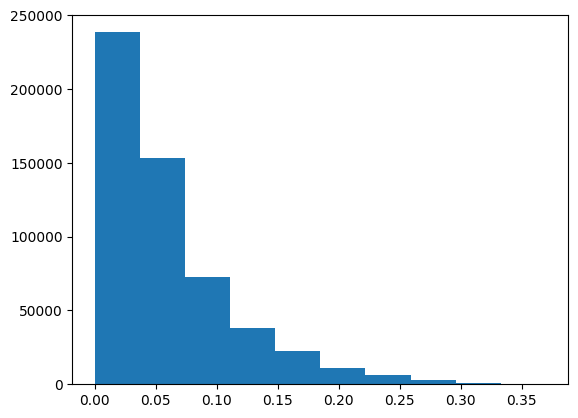

In [145]:
plt.hist(final_data.이동거리)
plt.show()

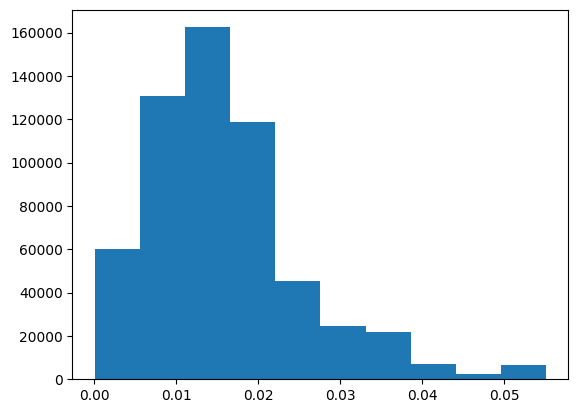

In [146]:
plt.hist(final_data.출발동_최근접_차고지_거리)
plt.show()

In [136]:
np.sum(final_data.이동거리 == 0)

13381